#**GDG TASK 4**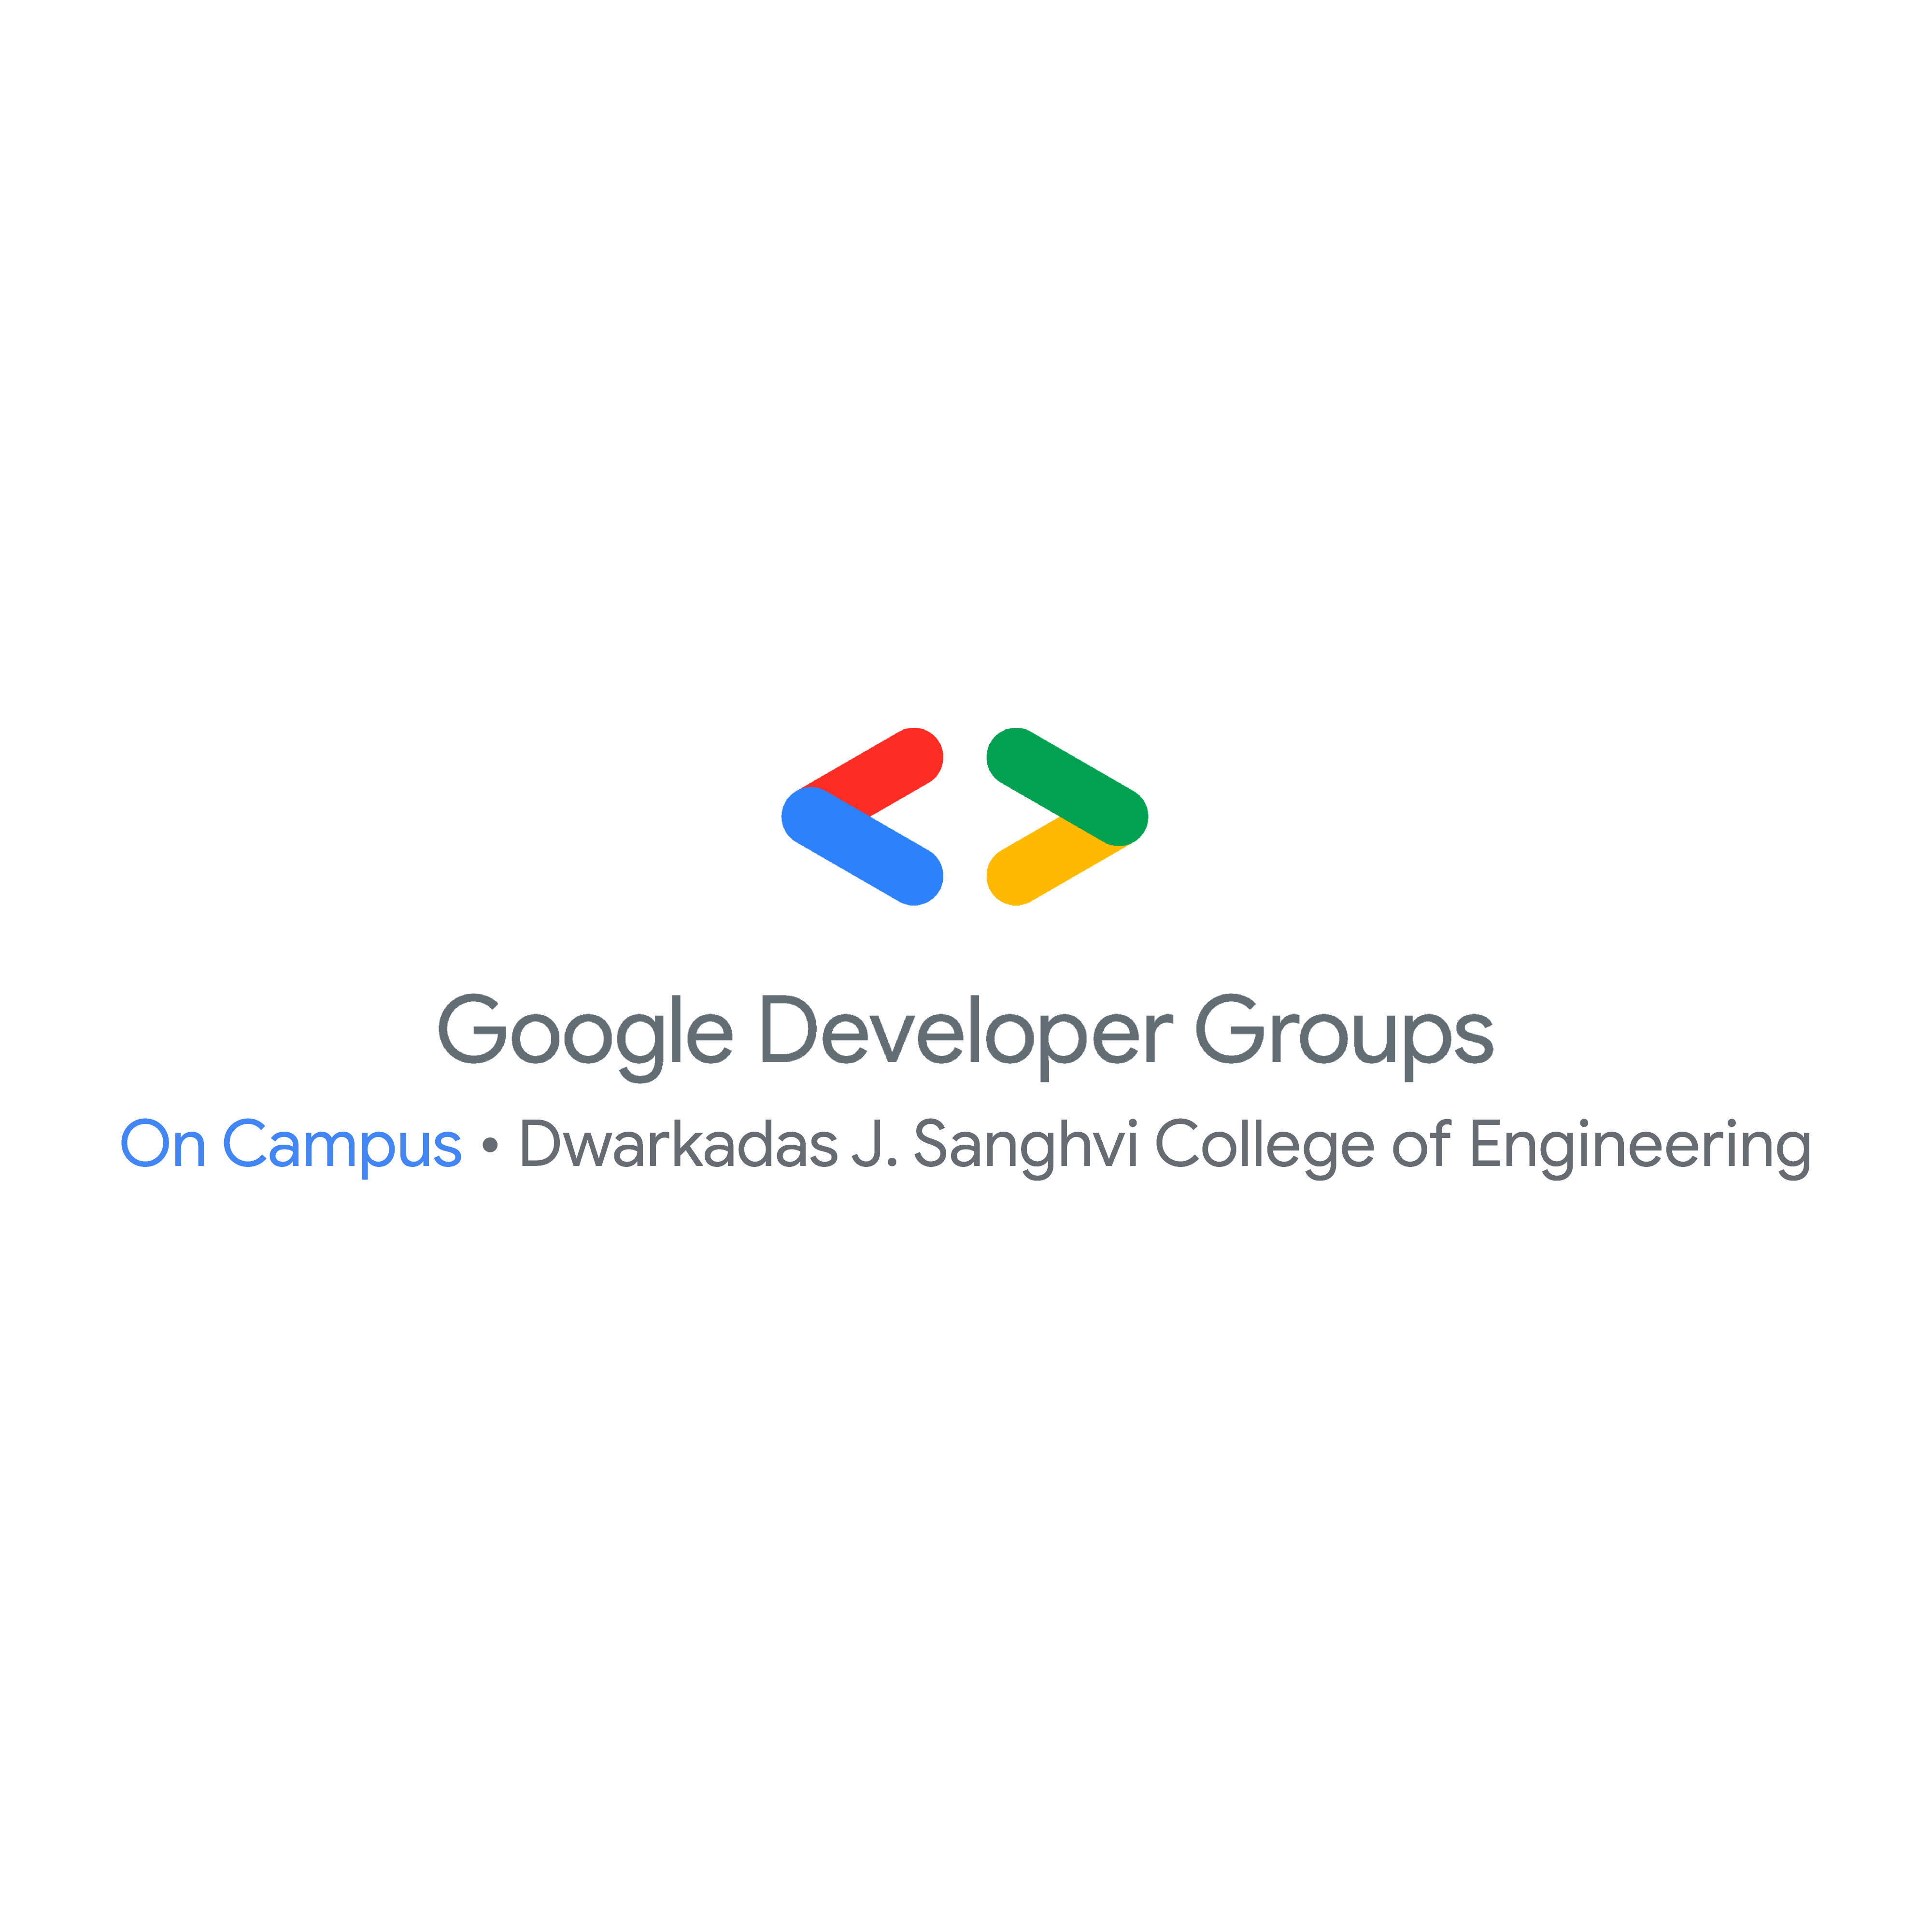

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#write code here
df = pd.read_csv('/kaggle/input/titanic-dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [3]:
# try researching about regex
df['Title'] = df['Name'].str.extract(r',\s*(\w+)\.')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [5]:
#write code here (PassengerId, Ticket, Name)
df = df.drop(columns = ['PassengerId', 'Ticket', 'Name'])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [8]:
#write code here
nan_perc = df.isnull().mean() * 100

nan_table = pd.DataFrame({
    "Column": nan_perc.index,
    "Percentage of NaN (%)": nan_perc.values
})

In [9]:
print(nan_table)

     Column  Percentage of NaN (%)
0  Survived               0.000000
1    Pclass               0.000000
2       Sex               0.000000
3       Age              19.865320
4     SibSp               0.000000
5     Parch               0.000000
6      Fare               0.000000
7     Cabin              77.104377
8  Embarked               0.224467
9     Title               0.112233


In [10]:
df = df.drop(columns = ['Cabin'])

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [12]:
#write code here
embark_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embark_mode)

In [13]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

In [14]:
print(df['Age'].isnull().sum(), df['Embarked'].isnull().sum())

0 0


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [15]:
#write code here
df['Family_members'] = df['SibSp'] + df['Parch']

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [17]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_norm = ['Age', 'Fare', 'Family_members']
df[columns_to_norm] = scaler.fit_transform(df[columns_to_norm])

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr,0.0


In [19]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)
columns_to_encode = ['Pclass', 'Sex', 'Title', 'Embarked']

encoded_data = encoder.fit_transform(df[columns_to_encode])
df_encoded = pd.DataFrame(
    encoded_data,
    columns = encoder.get_feature_names_out(columns_to_encode)
)

df_encoded = df_encoded.astype(int)

df = pd.concat([df.drop(columns=columns_to_encode), df_encoded], axis=1)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [20]:
#write code here
X = df.drop(columns=['Survived'])
y = df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
#write code here

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [21]:
#write code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>


In [22]:
#write code here
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

<b>Print the Model Accuracy</b>

In [23]:
#write code here
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.7761194029850746


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

Imagine a bank wants to automate the process of deciding whether to approve a loan application based on historical data of past applications. The bank has data on applicants, including:

- Age
- Income
- Credit Score
- Employment Status
- Loan Amount
- Repayment History (Good/Bad)
- Approved or Rejected (Target)

### How Decision Trees Help:
- A Decision Tree Classifier can be trained on historical loan application data to predict whether a new application should be approved or rejected.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

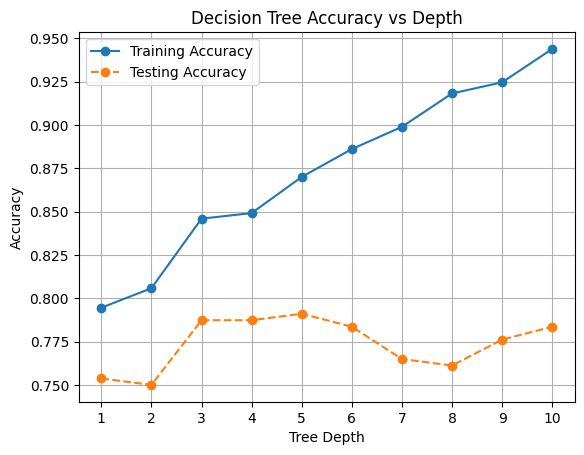

In [24]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracies = []
test_accuracies = []

for depth in range(1, 11):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    train_pred = tree_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    test_pred = tree_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

plt.plot(range(1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Testing Accuracy', marker='o', linestyle='--')
plt.title('Decision Tree Accuracy vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.grid()
plt.show()

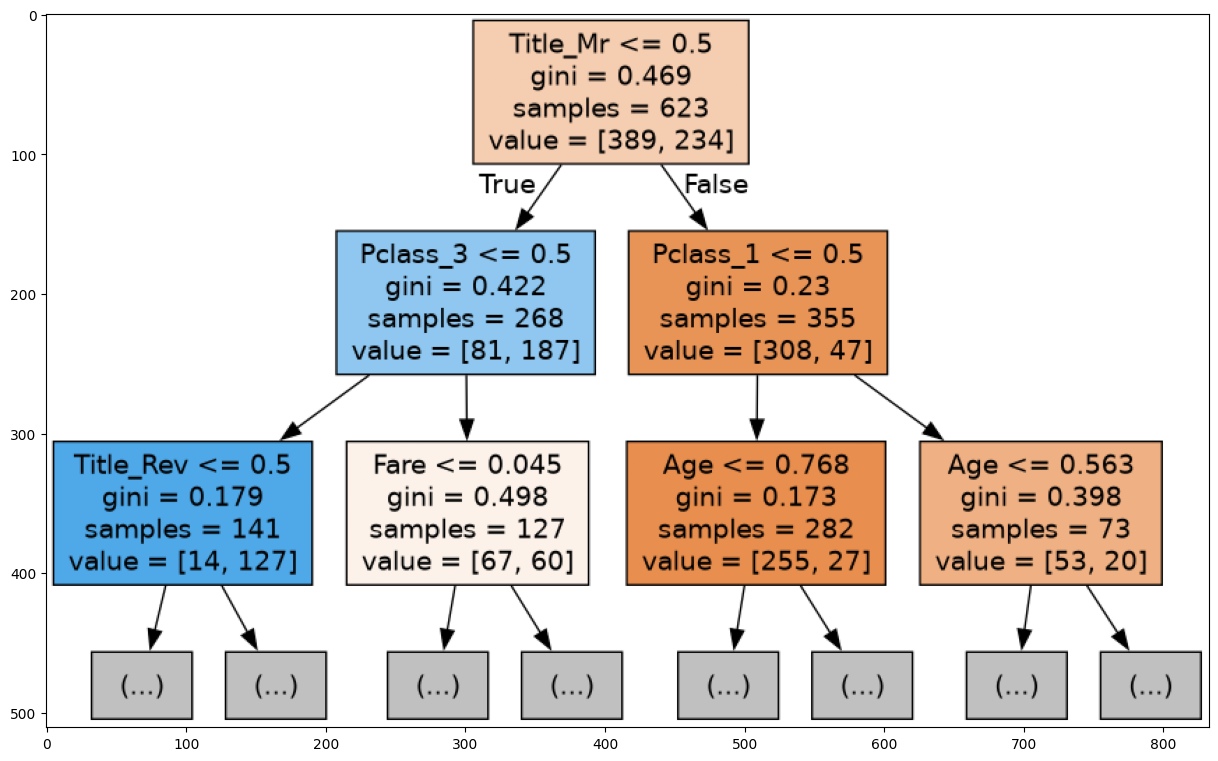

In [25]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(tree_clf, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

## Test Accuracy = 0.79 , Train Accuracy = 0.87

## Explain: What is your understanding of the charts you made above?

Ans:
 - **Optimal Depth**: The ideal depth for this decision tree seems to be around 3 to 4

 - **Overfitting**: At depths greater than 4, the training accuracy continues to rise, but the testing accuracy does not improve, indicating overfitting.

 - **Underfitting**: At depths less than 3, both training and testing accuracy are relatively low, meaning the model is too simple and unable to capture the complexity of the data.


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [27]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(623, 30) (623,) (268, 30) (268,)


In [28]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.64
Train Accuracy: 0.60


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

1. Core Concept\
    **Decision Tree Classifier**:

   - Works by splitting the dataset into subsets based on feature values, forming a tree-like structure.
        The goal is to find the splits that maximize information gain (or minimize Gini impurity/entropy).
        It is a rule-based, non-parametric algorithm.
     
     
    **Naive Bayes**:

    - Based on Bayes' Theorem, which calculates the probability of a class given the features.
        Assumes that all features are independent of each other (hence "naive").
        It is a probabilistic, parametric algorithm.

2. Assumptions\
    **Decision Tree Classifier**:

    - No specific assumptions about the distribution of data or feature independence.
        Handles both numerical and categorical data effectively.

    **Naive Bayes**:

    - Assumes independence between features (which rarely holds true in real-world datasets).
        Assumes a specific distribution for the data:
        Gaussian Naive Bayes assumes a normal distribution for numerical features.
        Multinomial Naive Bayes is suitable for discrete/categorical data (e.g., text classification).


3. Complexity\
    **Decision Tree Classifier**:

    - Training complexity depends on the number of samples, features, and the depth of the tree.
        Can be computationally expensive for large datasets due to recursive splitting.
        Prone to overfitting unless regularization techniques like pruning are applied.

    **Naive Bayes**:

    - Training is computationally efficient because it involves calculating probabilities and means/variances.
        Works well for large datasets but may underperform if the independence assumption is violated.

4. Interpretability\
    **Decision Tree Classifier**:

    - Highly interpretable as it produces a tree structure that is easy to visualize and understand.
        Each decision in the tree corresponds to a rule, making it suitable for explainability.

    **Naive Bayes**:

 - Less interpretable as it operates on probabilities and assumes independence, which may not reflect real-world relationships.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: 

1. When the Random Forest only contains one tree
2. All Decision Tress in the Random Forest are identical
3. When the Problem is Simple
4. When the Decision Tree does not Overfit 

## Extra - BaggingClassifier

In [29]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)
y_pred_test = bagging_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.98
Train Accuracy: 0.79


In [32]:
# Fine tuning using GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],        
    'max_samples': [0.5, 0.8, 1.0],      
    'max_features': [0.5, 0.8, 1.0],     
    'bootstrap': [True, False],          
    'bootstrap_features': [True, False]  
}

grid_search = GridSearchCV(
    estimator=bagging_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.86
Test Accuracy: 0.81


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

1. **Random Forest**: A specialized type of Bagging Classifier where the base model is a Decision Tree, and it introduces randomness in feature selection to reduce correlation between trees.

2. **Bagging Classifier**:  A general ensemble technique where multiple base estimators are trained on different random subsets of the data, and their predictions are averaged (regression) or voted (classification).

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [33]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

ada_boost.fit(X_train, y_train)

cv_scores = cross_val_score(ada_boost, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")

y_test_pred = ada_boost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")

Cross-Validation Scores: [0.832      0.832      0.8        0.80645161 0.79032258]
Test Accuracy: 0.81


## Explain: What is the difference between Bagging and Boosting?

Ans:

1. **Bagging** - Bagging involves training multiple models independently using random subsets of the data (created by bootstrapping), and then aggregating their predictions.

2. **Boosting** - Boosting involves training multiple models sequentially, where each subsequent model tries to correct the errors of the previous one.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

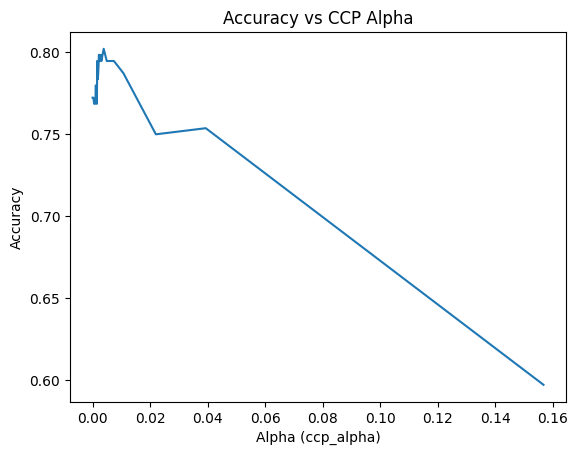

In [36]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

accuracies = []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    accuracies.append(pruned_tree.score(X_test, y_test))

# Find the best alpha
import matplotlib.pyplot as plt
plt.plot(ccp_alphas, accuracies)
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.show()

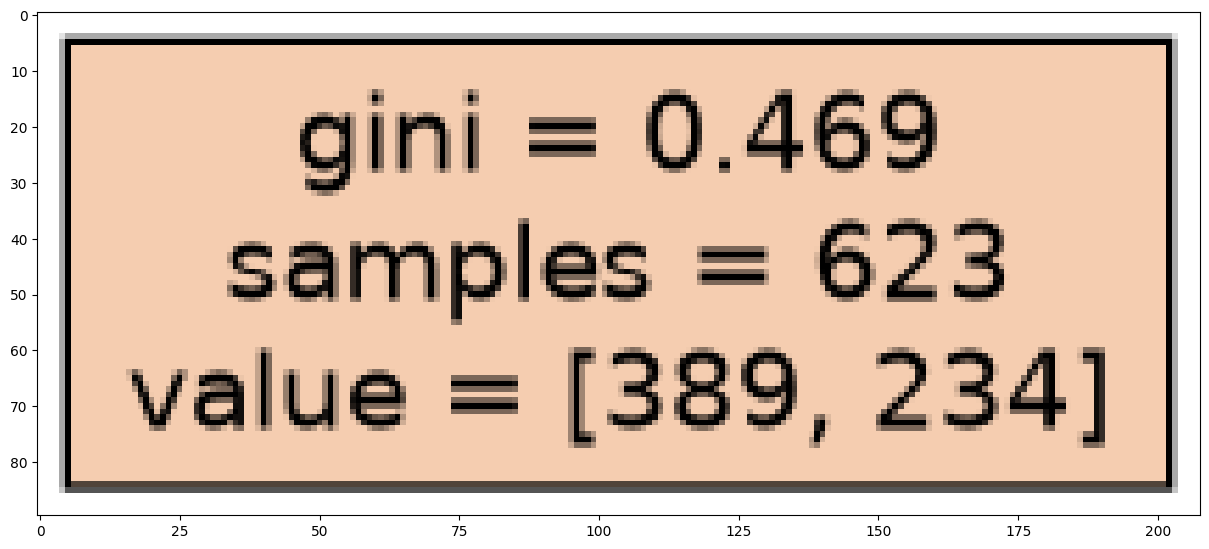

In [37]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
decision_tree = tree.export_graphviz(pruned_tree, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:

**Optimal model is Bagging Model** - ACCURACY -> 0.81

# **Compulsory Task**

### **XGBoost and AdaBoost Classifier and Regressor: A Comparative Overview**

Machine learning algorithms have evolved over time to handle complex datasets and tasks. Among the most popular ensemble techniques, **XGBoost** and **AdaBoost** have made significant impacts in the field of machine learning, both in classification and regression tasks. Although they are similar in some respects, they differ in their approach to building and improving model accuracy.

---

### **What is XGBoost?**

**XGBoost** (Extreme Gradient Boosting) is an optimized implementation of the **Gradient Boosting Machine (GBM)** algorithm. It is designed for speed and performance, often winning machine learning competitions due to its ability to handle large datasets efficiently and produce highly accurate results.

**Key Features:**
- **Boosting Technique**: XGBoost uses a gradient boosting method where weak learners (typically decision trees) are trained sequentially. Each tree is built to correct the errors of the previous one.
- **Regularization**: Unlike traditional GBM, XGBoost includes regularization (L1 and L2), which helps in reducing overfitting and improving model generalization.
- **Handling Missing Values**: XGBoost can handle missing values without the need for imputation, making it more robust in real-world datasets.
- **Speed and Efficiency**: XGBoost leverages hardware optimization and parallelization to speed up training.

**Use Cases**:
- XGBoost is widely used in both classification and regression problems, such as:
  - **Fraud detection**
  - **Customer churn prediction**
  - **Sales forecasting**

**Advantages**:
- Highly accurate and effective for complex datasets.
- Fast training and prediction due to parallelization.
- Handles both numerical and categorical data efficiently.

---

### **What is AdaBoost?**

**AdaBoost** (Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak classifiers (typically decision trees) to create a strong classifier. It assigns weights to each training instance, and those instances that are misclassified by previous models are given higher weights to ensure they are correctly classified by the next learner.

**Key Features:**
- **Boosting Technique**: AdaBoost builds a sequence of weak classifiers, each focusing on the instances that previous classifiers misclassified.
- **Weighted Voting**: The final model is a weighted combination of all weak learners, with more weight given to classifiers that perform well.
- **Simplicity**: AdaBoost is simpler to implement than other boosting techniques, such as XGBoost or Gradient Boosting.

**Use Cases**:
- AdaBoost is effective in classification tasks, especially in:
  - **Image classification**
  - **Spam email detection**
  - **Object recognition**

**Advantages**:
- Can significantly improve the performance of weak models.
- Helps in reducing bias, particularly when combined with weak learners like shallow decision trees.
- Simple to implement and tune.

---

### **Comparison Between XGBoost and AdaBoost**

| **Aspect**                | **XGBoost**                                  | **AdaBoost**                                  |
|---------------------------|----------------------------------------------|-----------------------------------------------|
| **Ensemble Technique**     | Gradient Boosting with regularization        | Adaptive Boosting with weighted voting        |
| **Performance**            | High accuracy, handles large datasets well   | Good accuracy, but may struggle with noisy data |
| **Speed**                  | Faster due to hardware optimization and parallelization | Slower due to sequential model building       |
| **Handling of Outliers**   | Robust to outliers, regularization helps    | Can be sensitive to noisy or outlier data     |
| **Overfitting**            | Regularization helps reduce overfitting     | Less prone to overfitting with weak learners  |
| **Use Case**               | Complex problems, large datasets, competitions | Simpler tasks, small to medium-sized datasets |
| **Model Complexity**       | More complex, requires careful tuning        | Simple, easy to implement with fewer parameters |

---

### **When to Use XGBoost vs AdaBoost**

- **XGBoost**:
  - When dealing with large datasets or complex problems.
  - When you need a model that is both fast and highly accurate.
  - For tasks that require fine-tuning and optimization (like in Kaggle competitions).

- **AdaBoost**:
  - When working with simpler models and less complex data.
  - When you need a quick and easy-to-implement boosting model.
  - For improving the performance of weak classifiers in scenarios where interpretability is important.

---

### **Conclusion**

Both **XGBoost** and **AdaBoost** are powerful tools in the machine learning arsenal, each with its strengths and ideal use cases. XGBoost, with its robust performance and speed, is suitable for large, complex datasets, while AdaBoost, with its simplicity and effectiveness in reducing bias, works best for smaller, less noisy datasets. Understanding the differences and when to use each can greatly enhance model performance and predictive accuracy in various tasks. 

In summary:
- **XGBoost** is the go-to choice for large, complex datasets requiring high accuracy.
- **AdaBoost** is ideal for simpler, smaller datasets or when you want to enhance weak learners.

Choosing the right boosting algorithm depends on the specific needs of your project and the type of data you are working with.

---

Feel free to explore both algorithms further and experiment with them on your own datasets to see the results!

# **End of Task**
